In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
%matplotlib inline

pd.set_option('max_rows', 500)

from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [2]:
fuelco = pd.read_csv('../../datasets/pandas-cookbook/vehicles.csv.zip')

C:\Users\Preben\Miniconda3\envs\data-analysis\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### 1. Summary statistics using `describe`

In [3]:
fuelco.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,39101.0,17.442712,4.580230,0.06,14.330870,17.347895,20.115000,47.087143
barrelsA08,39101.0,0.219276,1.143837,0.00,0.000000,0.000000,0.000000,18.311667
charge120,39101.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
charge240,39101.0,0.029630,0.487408,0.00,0.000000,0.000000,0.000000,12.000000
city08,39101.0,18.077799,6.970672,6.00,15.000000,17.000000,20.000000,150.000000
city08U,39101.0,5.040648,10.462790,0.00,0.000000,0.000000,0.000000,150.000000
cityA08,39101.0,0.569883,4.297124,0.00,0.000000,0.000000,0.000000,145.000000
cityA08U,39101.0,0.416097,4.093495,0.00,0.000000,0.000000,0.000000,145.083500
cityCD,39101.0,0.000560,0.045392,0.00,0.000000,0.000000,0.000000,5.350000
cityE,39101.0,0.225181,3.180894,0.00,0.000000,0.000000,0.000000,122.000000


#### 2. Check datatypes

In [4]:
fuelco.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
fuelType            object
fuelType1           object
ghgScore             int64
ghgScoreA            int64
highway08            int64
highway08U         float64
highwayA08           int64
h

#### 3. Summarize the types of columns

In [5]:
fuelco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

#### 4. Select memory usage

In [6]:
fuelco.memory_usage(deep=True).sum() / 1048576

61.8726110458374

#### 5. Convert dtypes to more memory efficient dtypes

In [7]:
# Convert int64
downcast = fuelco.select_dtypes('int64').describe().T.index

for col in downcast:
    fuelco[col] = pd.to_numeric(fuelco[col], downcast='integer')

In [8]:
# convert strings to categories
nunique = fuelco.select_dtypes('object').nunique()
counts = fuelco.select_dtypes('object').count()
cardinality = nunique.div(counts) * 100
low_cardinality = cardinality[cardinality < 5]

for col in low_cardinality.index:
    fuelco[col] = fuelco[col].astype('category')

#### 6. Check memory usages again

In [9]:
fuelco.memory_usage(deep=True).sum() / 1048576

19.629825592041016

#### 7. Explore categorical data

In [10]:
fuelco.select_dtypes(['object', 'category']).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [11]:
print('fuelco.drive nunique: ', fuelco.drive.nunique())
print('fuelco.drive isna: ', fuelco.drive.isna().sum())
print('fuelco.drive isna %: ', fuelco.drive.isna().mean() * 100)

fuelco.drive nunique:  7
fuelco.drive isna:  1189
fuelco.drive isna %:  3.0408429451932175


In [24]:
top_n = fuelco.make.value_counts().index[:6].to_list()

(
fuelco
.assign(make=np.where(fuelco.make.isin(top_n), fuelco.make, 'other'))
.make.value_counts()
)

other        23211
Chevrolet     3900
Ford          3208
Dodge         2557
GMC           2442
Toyota        1976
BMW           1807
Name: make, dtype: int64

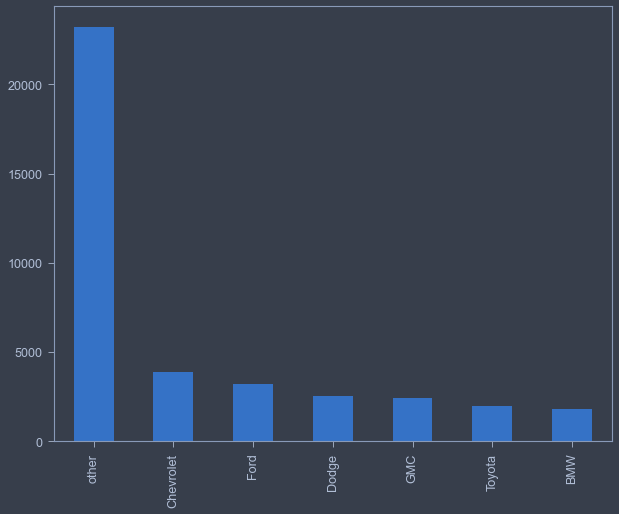

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

(fuelco
.assign(make=np.where(fuelco.make.isin(top_n), fuelco.make, 'other'))
.make.value_counts()
.plot.bar(ax=ax)
);

In [36]:
(
fuelco.rangeA.str.extract(r'([^0-9.])')
.dropna()
.apply(lambda row: ''.join(row), axis=1)
.value_counts()
)

/    280
-     71
dtype: int64

In [37]:
(
fuelco.rangeA.fillna('0')
.str.replace('-', '/')
.str.split('/', expand=True)
.astype(float)
.mean(axis=1)

)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39096    0.0
39097    0.0
39098    0.0
39099    0.0
39100    0.0
Length: 39101, dtype: float64